In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X=data.drop('target',axis=1)
y=data['target']

In [5]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
x_test=scalar.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report : ",classification_report(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.7951219512195122
Classification Report :                precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:  [[73 29]
 [13 90]]


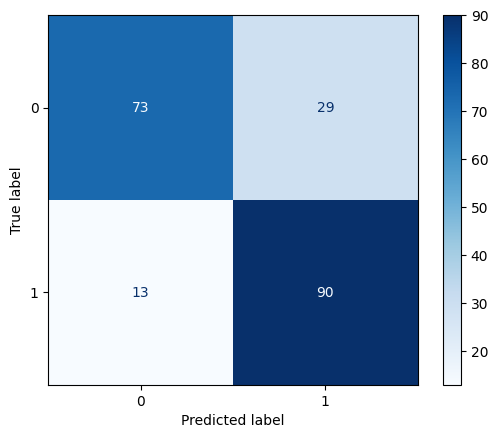

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,cmap="Blues")
plt.show()

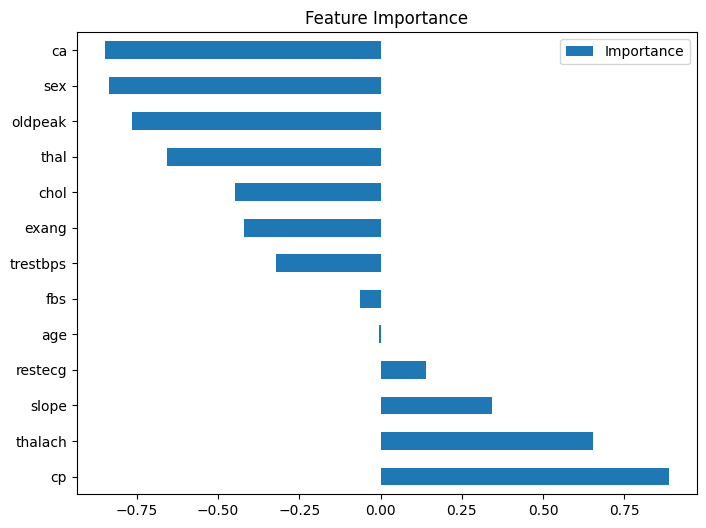

In [8]:
# Ensure 'X' contains original column names
columns = X.columns  # Save original feature names

# Create DataFrame for feature importance
coefficients = pd.DataFrame(model.coef_[0], index=columns, columns=['Importance'])

# Plot feature importance
coefficients.sort_values(by='Importance', ascending=False).plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.show()